# E2-13. 유방암 여부 진단 프로젝트

## (1) 필요한 모듈 import하기

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## (2) 데이터 준비

In [19]:
cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

In [20]:
X.shape, y.shape

((569, 30), (569,))

In [21]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## (3) 데이터 이해하기

In [22]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Feature Data 지정하기

In [23]:
X = cancer.data
X.shape

(569, 30)

### Label Data 지정하기

In [24]:
y = cancer.target
y.shape

(569,)

### Target Names 출력해 보기

In [25]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### Feature Names 출력해 보기

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터 Describe 해보기

In [29]:
cancer_df = pd.DataFrame(data = X, columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
# 샘플로 1개의 데이터 확인
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

## (4) train, test 데이터 분리

In [32]:
# 데이터셋 나누기 - train/test(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [33]:
X_train.shape

(455, 30)

In [34]:
X_test.shape

(114, 30)

## (5) 다양한 모델로 학습시켜보기 및 평가

### Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier(random_state = 32)


# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [36]:
# 정확도
print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.9473684210526315


### Grid Search - 하이퍼 파라미터 튜닝

In [37]:
# 1. 반복문 사용
depth_list = range(1, 30)

# 각각의 max_depth에  따른 train/test 정확도 저장할 리스트
train_acc_list = []
test_acc_list = []

In [38]:
for depth in depth_list:
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 32)
    decision_tree.fit(X_train, y_train)
    
    pred_train = decision_tree.predict(X_train)
    pred_test = decision_tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [39]:
result = pd.DataFrame(dict(max_depth = depth_list,
                          Train = train_acc_list,
                          Test = test_acc_list))
result

,max_depth,Train,Test
0,1,0.920879,0.894737
1,2,0.929670,0.929825
2,3,0.978022,0.938596
3,4,0.995604,0.938596
4,5,0.995604,0.947368
5,6,0.997802,0.947368
6,7,1.000000,0.947368
7,8,1.000000,0.947368
8,9,1.000000,0.947368
9,10,1.000000,0.947368


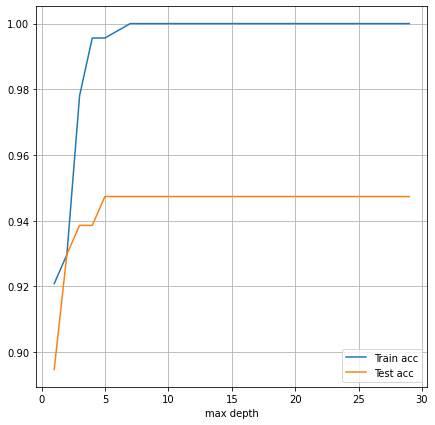

In [40]:
# 그래프 그리기

plt.figure(figsize=(7,7))
plt.plot(depth_list, train_acc_list, label = 'Train acc')
plt.plot(depth_list, test_acc_list, label = 'Test acc')
plt.xlabel("max depth")
plt.grid(True)
plt.legend()
plt.show()

#### RandomizedSearchCV
- 주요 매개변수
    - estimator: 모델객체 지정
    - param_distributions : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - n_iter : 파라미터 검색 횟수
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환

In [41]:
decision_tree = DecisionTreeClassifier()

# 360개의 조합
param_grid = {
    'max_depth': range(1, 21),  # 20
    'max_leaf_nodes': range(2, 11),  # 9
    'criterion': ['gini', 'entropy'],  # 2
    'random_state': [1, 32]
}
n_iter = 50  # 확인할 조합의 개수. default: 10개
randomized_search = RandomizedSearchCV(decision_tree,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      scoring = "accuracy",
                                      cv = 3,
                                      n_jobs = -1)


In [42]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 21),
                                        'max_leaf_nodes': range(2, 11),
                                        'random_state': [1, 32]},
                   scoring='accuracy')

In [43]:
df = pd.DataFrame(randomized_search.cv_results_)
df.shape

(50, 15)

In [44]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003168,0.000108,0.000446,1.225687e-05,1,5,8,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.934211,0.921053,0.920530,0.925264,0.006330,15
1,0.006135,0.000526,0.000505,6.241560e-05,1,9,19,entropy,"{'random_state': 1, 'max_leaf_nodes': 9, 'max_...",0.940789,0.921053,0.907285,0.923042,0.013750,22
2,0.005570,0.000511,0.000371,1.586633e-05,1,6,7,entropy,"{'random_state': 1, 'max_leaf_nodes': 6, 'max_...",0.934211,0.927632,0.927152,0.929665,0.003220,3
3,0.003138,0.000238,0.000355,3.051344e-05,1,6,10,gini,"{'random_state': 1, 'max_leaf_nodes': 6, 'max_...",0.934211,0.914474,0.920530,0.923071,0.008256,20
4,0.002118,0.000011,0.000333,4.199297e-06,32,4,2,gini,"{'random_state': 32, 'max_leaf_nodes': 4, 'max...",0.940789,0.907895,0.933775,0.927486,0.014146,7
5,0.002651,0.000029,0.000349,1.828463e-05,32,3,11,gini,"{'random_state': 32, 'max_leaf_nodes': 3, 'max...",0.940789,0.888158,0.933775,0.920907,0.023334,25
6,0.005772,0.000589,0.000348,2.060387e-05,32,10,16,entropy,"{'random_state': 32, 'max_leaf_nodes': 10, 'ma...",0.940789,0.921053,0.900662,0.920835,0.016383,34
7,0.002219,0.000026,0.000324,8.823277e-06,1,8,1,entropy,"{'random_state': 1, 'max_leaf_nodes': 8, 'max_...",0.901316,0.901316,0.867550,0.890060,0.015918,41
8,0.002600,0.000034,0.000344,9.584967e-06,32,3,13,gini,"{'random_state': 32, 'max_leaf_nodes': 3, 'max...",0.940789,0.888158,0.933775,0.920907,0.023334,25
9,0.002916,0.000142,0.000338,8.591895e-06,1,5,20,gini,"{'random_state': 1, 'max_leaf_nodes': 5, 'max_...",0.934211,0.921053,0.920530,0.925264,0.006330,15


In [45]:
randomized_search.best_params_

{'random_state': 32,
 'max_leaf_nodes': 8,
 'max_depth': 11,
 'criterion': 'entropy'}

In [46]:
randomized_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=8,
                       random_state=32)

#### 최적의 하이퍼 파라미터로 재학습

In [55]:
decision_tree = DecisionTreeClassifier(random_state = 32,
                                       max_leaf_nodes = 8,
                                       max_depth = 11,
                                       criterion = 'entropy')
# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [56]:
print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 0.9846153846153847
Test 정확도: 0.956140350877193


#### 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ##### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ##### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ##### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ##### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ##### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

####   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [57]:
# 예측값, 실제값(Ground Truth)
# (pred_train, y_train), (pred_test, y_test)
# 전부 0으로 예측
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[166   3]
 [  4 282]]
--------------------------------------------------
Test confusion matrix
[[39  4]
 [ 1 70]]


### Random Forest

In [61]:
# Random Forest import하기
rf = RandomForestClassifier(random_state = 32)

# 모델 학습
rf.fit(X_train, y_train)

# 모델 예측
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### SVM

In [62]:
# SVM import하기
svm_model = svm.SVC(random_state = 32)


# 모델 학습
svm_model.fit(X_train, y_train)

# 모델 예측
y_pred = svm_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### SGD Classifier

In [63]:
# SGD Classifier import하기
sgd_model = SGDClassifier(random_state = 32)


# 모델 학습
sgd_model.fit(X_train, y_train)

# 모델 예측
y_pred = sgd_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.93      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Logistic Regression

In [64]:
# LogisticRegression import하기
logistic_model = LogisticRegression(random_state = 32)


# 모델 학습
logistic_model.fit(X_train, y_train)

# 모델 예측
y_pred = logistic_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (6) 모델 평가해 보기
- 1. 학습된 모델들의 테스트 데이터 예측 결과 어떻게 해석
- Test_data 기준
    - (accuracy) LogisticRegression(0.96) > RandomForest(0.96) > SGD Classifier(0.96) > DecisionTree(0.96) > SVM(0.95)
    - (f1 score) RandomForest(0.98) > LogisticRegression(0.96) =  SGD Classifier(0.96) = RandomForest(0.96) > DecisionTree(0.96) > SVM(0.95)
    - (Precision) LogisticRegression(0.97) = RandomForest(0.97)> SGD Classifier(0.96) > DecisionTree(0.96)
    - (Recall) LogisticRegression(0.96) > RandomForest(0.96)> DecisionTree(0.96) = SGD Classifier(0.96) > SVM(0.95)
    - (Specificity) RandomForest(0.96) = LogisticRegression(0.96) = SGD Classifier(0.96) = DecisionTree(0.96) > SVM(0.95)
    
- 2. 모델 성능 평가하는 지표로 무엇이 좋은지 평가지표 중 적절한 것 선택 및 근거
 > 3개의 항목에서LogisticRegression이 가장 높은 점수, 2개의 항목에서 RandomFroest에서 가장 높은 점수

### 보충. 모든 모델의 성능을 평가하는데 Classification Report 활용
- Decision Tree는 최적의 파라미터 탐색해 재학습 진행
- 추후, RandomForest, SVM, Logistic Regression에 대한 그리드 서치 진행해 모델 간 성능 재비교